# Data Manipulation

Let's first read in a dataset with Pandas. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import os

os.chdir('C:\\Users\\alexa\\Desktop\\BYU_Data_Science_Club\\Data Structures - Pandas - Numpy - TSA')

dataset = pd.read_csv('mbci_adj.csv')

dataset.head()

,date,austin_round_rock,brownsville_harlingen,dallas_plano_irving,el_paso,fort_worth_arlington,houston_the_woodlands_sugar_land,laredo,mcallen_edinburg_mission,san_antonio_new_braunfels
0,1978-07-01,NaN,NaN,NaN,NaN,NaN,86.529729,NaN,NaN,NaN
1,1978-08-01,NaN,NaN,NaN,NaN,NaN,86.794779,NaN,NaN,NaN
2,1978-09-01,NaN,NaN,NaN,NaN,NaN,86.907004,NaN,NaN,NaN
3,1978-10-01,89.492940,NaN,88.036578,92.212635,88.358256,87.482428,NaN,NaN,89.852362
4,1978-11-01,90.025119,NaN,88.599577,92.840389,89.008613,87.872161,NaN,NaN,90.213950


This dataset contains the Metro Business-Cycle Index for several cities in Texas. The index gives an idea of how the economy is doing within the city.

I got the data from here:  https://data.world/adamhelsinger/tx-historical-bus-cycles
You can read more about the data itself here:  https://www.dallasfed.org/research/econdata/mbci.cfm

The read_csv method brings in the data as a Pandas dataframe. As such, it cannot be sliced as can a matrix. Below are some examples of how you can subset a Pandas dataframe.

In [3]:
#These all print the first five rows.

#This example is most similar to slicing with a matrix
dataset.iloc[:5,:]

#Without iloc, you can slice rows only within brackets
dataset[:5]

#The default number of rows in 5 with the head method. This method comes from Pandas
dataset.head()
dataset.head(5)

,date,austin_round_rock,brownsville_harlingen,dallas_plano_irving,el_paso,fort_worth_arlington,houston_the_woodlands_sugar_land,laredo,mcallen_edinburg_mission,san_antonio_new_braunfels
0,1978-07-01,NaN,NaN,NaN,NaN,NaN,86.529729,NaN,NaN,NaN
1,1978-08-01,NaN,NaN,NaN,NaN,NaN,86.794779,NaN,NaN,NaN
2,1978-09-01,NaN,NaN,NaN,NaN,NaN,86.907004,NaN,NaN,NaN
3,1978-10-01,89.492940,NaN,88.036578,92.212635,88.358256,87.482428,NaN,NaN,89.852362
4,1978-11-01,90.025119,NaN,88.599577,92.840389,89.008613,87.872161,NaN,NaN,90.213950


You can select columns by simply placing the column name within the brackets. The output will be a Pandas series, which is a list with indices. It can be sliced like a dataframe except that the series is one-dimensional.

In [4]:
dataset['austin_round_rock'].iloc[:5]

0          NaN
1          NaN
2          NaN
3    89.492940
4    90.025119
Name: austin_round_rock, dtype: float64

In [5]:
dataset['austin_round_rock'].head()

0          NaN
1          NaN
2          NaN
3    89.492940
4    90.025119
Name: austin_round_rock, dtype: float64

# Time Series

Let's say we want to read in the dataset again, but as a time series this time.

In [6]:
#define a function that will format your date
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

TSAdata = pd.read_csv('mbci_adj.csv', parse_dates=['date'], index_col='date',date_parser=dateparse)

TSAdata.head()

,austin_round_rock,brownsville_harlingen,dallas_plano_irving,el_paso,fort_worth_arlington,houston_the_woodlands_sugar_land,laredo,mcallen_edinburg_mission,san_antonio_new_braunfels
date,,,,,,,,,
1978-07-01,NaN,NaN,NaN,NaN,NaN,86.529729,NaN,NaN,NaN
1978-08-01,NaN,NaN,NaN,NaN,NaN,86.794779,NaN,NaN,NaN
1978-09-01,NaN,NaN,NaN,NaN,NaN,86.907004,NaN,NaN,NaN
1978-10-01,89.492940,NaN,88.036578,92.212635,88.358256,87.482428,NaN,NaN,89.852362
1978-11-01,90.025119,NaN,88.599577,92.840389,89.008613,87.872161,NaN,NaN,90.213950


Notice that the date column is now an index rather than a date. The original index has now been replaced. You can now access rows by their date index as well as the numerical index.

In [18]:
#These all print the first five rows.

#By date
TSAdata.index
TSAdata['1978']
TSAdata['1978-07']

#TSAdata[:5]
#TSAdata.iloc[:5,:]

,austin_round_rock,brownsville_harlingen,dallas_plano_irving,el_paso,fort_worth_arlington,houston_the_woodlands_sugar_land,laredo,mcallen_edinburg_mission,san_antonio_new_braunfels
date,,,,,,,,,
1978-07-01,NaN,NaN,NaN,NaN,NaN,86.529729,NaN,NaN,NaN


Let's pretend for a minute that the dates were not included with the data.

In [57]:
data = pd.read_csv('mbci_adj.csv')

data = data.iloc[:,1:]

data

,austin_round_rock,brownsville_harlingen,dallas_plano_irving,el_paso,fort_worth_arlington,houston_the_woodlands_sugar_land,laredo,mcallen_edinburg_mission,san_antonio_new_braunfels
0,NaN,NaN,NaN,NaN,NaN,86.529729,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,86.794779,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,86.907004,NaN,NaN,NaN
3,89.492940,NaN,88.036578,92.212635,88.358256,87.482428,NaN,NaN,89.852362
4,90.025119,NaN,88.599577,92.840389,89.008613,87.872161,NaN,NaN,90.213950
5,90.574132,NaN,89.239195,93.383719,89.601853,88.459481,NaN,NaN,90.523119
6,91.110455,NaN,89.505152,94.186327,89.755360,89.424111,NaN,NaN,91.039432
7,91.648608,NaN,90.346295,94.714865,90.270610,89.871472,NaN,NaN,91.486188
8,92.151880,NaN,91.044979,94.969683,90.890019,90.667145,NaN,NaN,92.014502
9,92.647010,NaN,91.443758,95.177212,91.312578,90.636462,NaN,NaN,92.425469


However, we were told that the data begin on July 1, 1978 and progress to the next row by one month to December 1, 2016. Let's create a date_range and use that as our index. The freq will be 'MS': 'M' for month and 'S' for start. 'M' would give us the last day of each month, beginning with July.

In [58]:
index_ = pd.date_range('1978-07-01', freq = 'MS', periods = 12 * (2016-1978) + 6)

index_[:5]

DatetimeIndex(['1978-07-01', '1978-08-01', '1978-09-01', '1978-10-01',
               '1978-11-01'],
              dtype='datetime64[ns]', freq='MS')

In [59]:
index_[-5:]

DatetimeIndex(['2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01',
               '2016-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [62]:
TSAdata2 = pd.DataFrame(data, index = index_)

TSAdata2.head()

,austin_round_rock,brownsville_harlingen,dallas_plano_irving,el_paso,fort_worth_arlington,houston_the_woodlands_sugar_land,laredo,mcallen_edinburg_mission,san_antonio_new_braunfels
1978-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1978-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1978-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1978-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1978-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Stationarity

We will be using ARIMA models to predict future values using our time series. ARIMA models require stationary data. 

Stationarity:

1. The dependent variables are not a function of time. In other words, their values do not increase or decrease with time.

2. Variance is not a function of time. Increasing variance with time is known as homoscedasticity. 

3. The covariance is not a function of time.

See this article for a detailed explanation of stationarity: https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/

In [101]:
airplanes = pd.read_csv('AirPassengers.txt') 
                        
airplanes.head()

,Unnamed: 0,time,AirPassengers
0,1,1949.000000,112
1,2,1949.083333,118
2,3,1949.166667,132
3,4,1949.250000,129
4,5,1949.333333,121


In [102]:
airplanes[-5:]

,Unnamed: 0,time,AirPassengers
139,140,1960.583333,606
140,141,1960.666667,508
141,142,1960.750000,461
142,143,1960.833333,390
143,144,1960.916667,432


In [103]:
airplanes = airplanes['AirPassengers']

index_ = pd.date_range('1949/01/01', freq = 'MS', periods = 12 * (1961-1949))
index_

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [104]:
airplanes.index = index_

airplanes.head()

1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Freq: MS, Name: AirPassengers, dtype: int64

In [107]:
type(airplanes)

pandas.core.series.Series

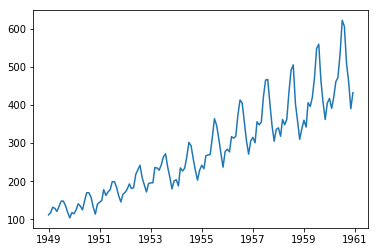

In [108]:
plt.plot(airplanes)
plt.show()

This time series validates both the first and the second assumption. Both the variance and the dependent variable increase with time. This is obvious to the eye, but there are times when this may not be so obvious. We are going to build a function that will tell us and show us whether a time series is stationary.

The Dickey-Fuller Test (adfuller in the code below) checks stationarity. Here the null hypothesis is that the time series is non-stationary. The test results comprise of a Test Statistic and some Critical Values for different confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

The rolling mean is often used to predict a future value. It shows the smooth trend of the data. We are going to use it here to test the first requirement for stationarity visually.

In [109]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\Users\alexa\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\alexa\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


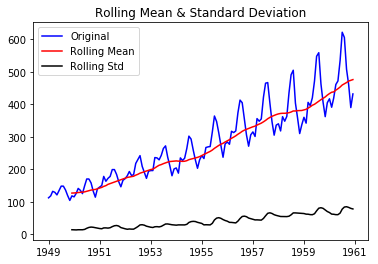

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [110]:
test_stationarity(airplanes)

The Dickey-Fuller Test is telling us that our time series is not even close to stationary! Look at that high p-value!

We need to remove the upward trend of the data with a transform. Any ideas?



Guess...







































Let's start with a logarithmic transform.

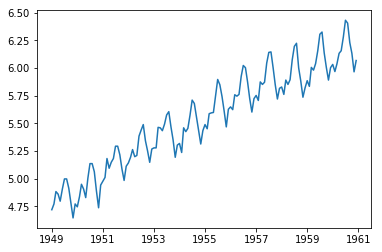

In [111]:
airplanes_log = np.log(airplanes)

plt.plot(airplanes_log)
plt.show()

That seemed to remove some of homoscedasticity but did little to remove the trend.

We can take the moving average of the log-transformed data.

C:\Users\alexa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


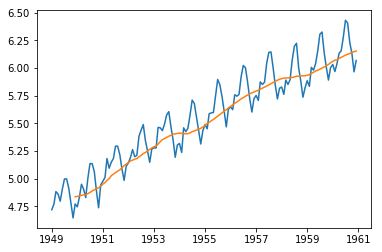

In [115]:
airplanes_log_ma = pd.rolling_mean(airplanes_log, 12)

plt.plot(airplanes_log)
plt.plot(airplanes_log_ma)
plt.show()

In [116]:
airplanes_log_ma_diff = airplanes_log - airplanes_log_ma

airplanes_log_ma_diff.head(12)

1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Freq: MS, Name: AirPassengers, dtype: float64

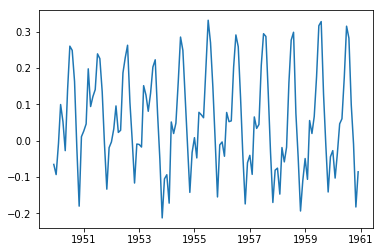

In [117]:
airplanes_log_ma_diff.dropna(inplace=True)

plt.plot(airplanes_log_ma_diff)
plt.show()

This is looking good. Let's test it.

C:\Users\alexa\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\alexa\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


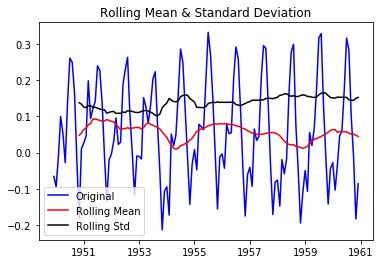

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [118]:
test_stationarity(airplanes_log_ma_diff)

# ARIMA Models

ARIMA models are used to make predictions for future values using a time series. 

AR = Autoregressive

I = Integrated

MA = Moving Avearge

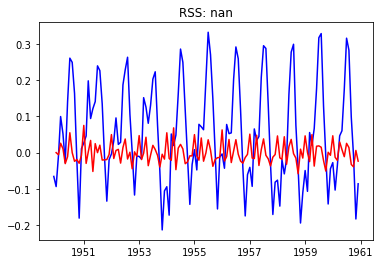

In [125]:
# AR Model

from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(airplanes_log_ma_diff, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(airplanes_log_ma_diff, color = 'blue')
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-airplanes_log_ma_diff)**2))
plt.show()

C:\Users\alexa\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


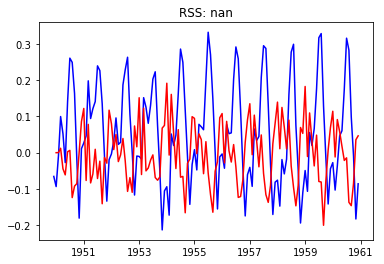

In [129]:
# MA Model

airplanes_log_ma_diff.dropna(inplace=True)

model = ARIMA(airplanes_log_ma_diff, order=(0,1,2))  
results_AR = model.fit(disp=-1)  
plt.plot(airplanes_log_ma_diff, color = 'blue')
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-airplanes_log_ma_diff)**2))
plt.show()

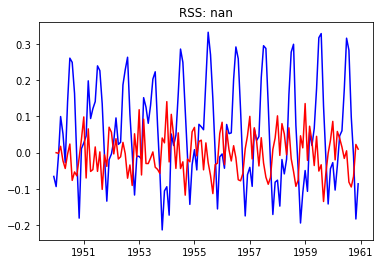

In [126]:
model = ARIMA(airplanes_log_ma_diff, order=(2,1,2))  
results_AR = model.fit(disp=-1)  
plt.plot(airplanes_log_ma_diff, color = 'blue')
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-airplanes_log_ma_diff)**2))
plt.show()